### *Task1 - Exploratory Data Analysis (EDA) and Business Insights*

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the Datasets

customers = pd.read_csv("C:/Users/SHUBHAM/Downloads/Customers.csv")
products = pd.read_csv("C:/Users/SHUBHAM/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/SHUBHAM/Downloads/Transactions.csv")

In [4]:
# Displaying dataset info

print("Customers:\n", customers.info(), "\n")
print("Products:\n", products.info(), "\n")
print("Transactions:\n", transactions.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Customers:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ----

In [5]:
# Converting date column to datetime

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

##### Exploratory Data Analysis (EDA)

In [7]:
# Merging datasets for comprehensive analysis

merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(merged_data.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [8]:
# Checking for missing values

print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())


Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [9]:
# Descriptive Statistics

print("Descriptive statistics:\n", merged_data.describe())

Descriptive statistics:
                      TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%              


Regional Sales:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


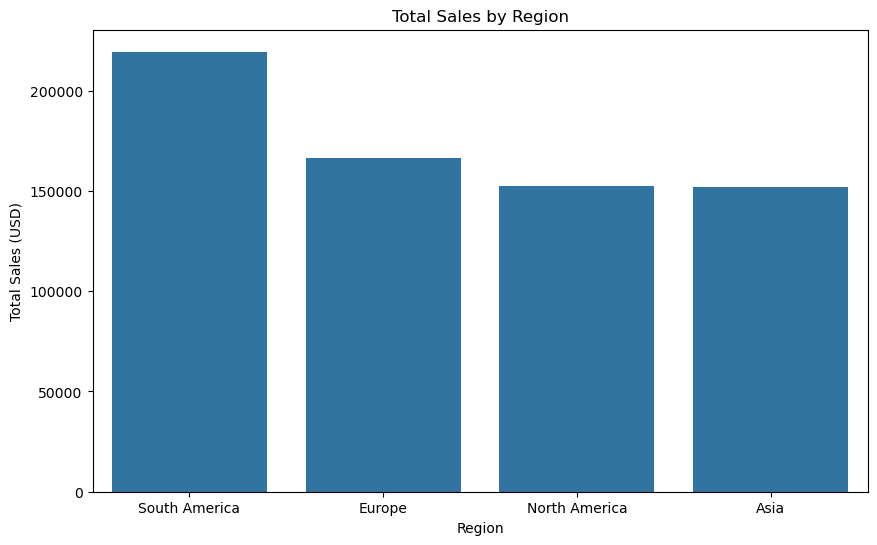

In [10]:
# Visualization and Insight Derivation

# Regional Performance

regional_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRegional Sales:\n", regional_sales)
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title("Total Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Region")
plt.show()


Product Popularity by Category:


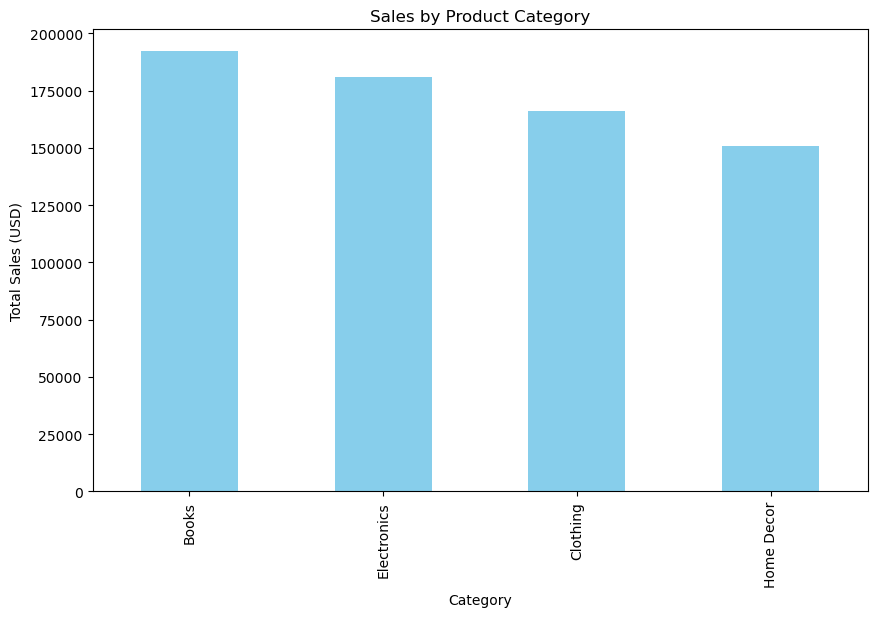

In [11]:
# Product Popularity

product_popularity = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nProduct Popularity by Category:")
plt.figure(figsize=(10, 6))
product_popularity.plot(kind='bar', title="Sales by Product Category", ylabel="Total Sales (USD)", color="skyblue")
plt.show()


Monthly Sales Trends:


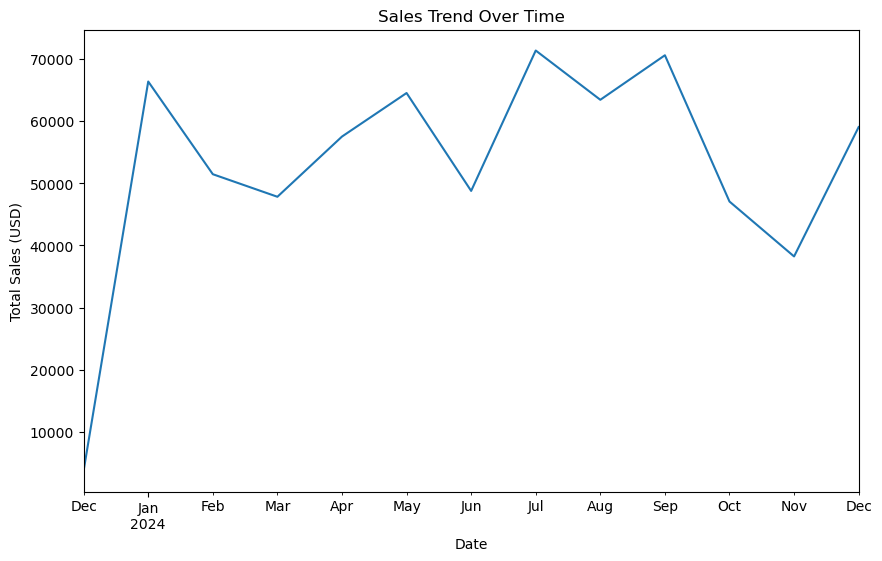

In [12]:
# Seasonal Trends

merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("\nMonthly Sales Trends:")
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', title="Sales Trend Over Time", ylabel="Total Sales (USD)", xlabel="Date")
plt.show()


Top 10 High-Value Customers:


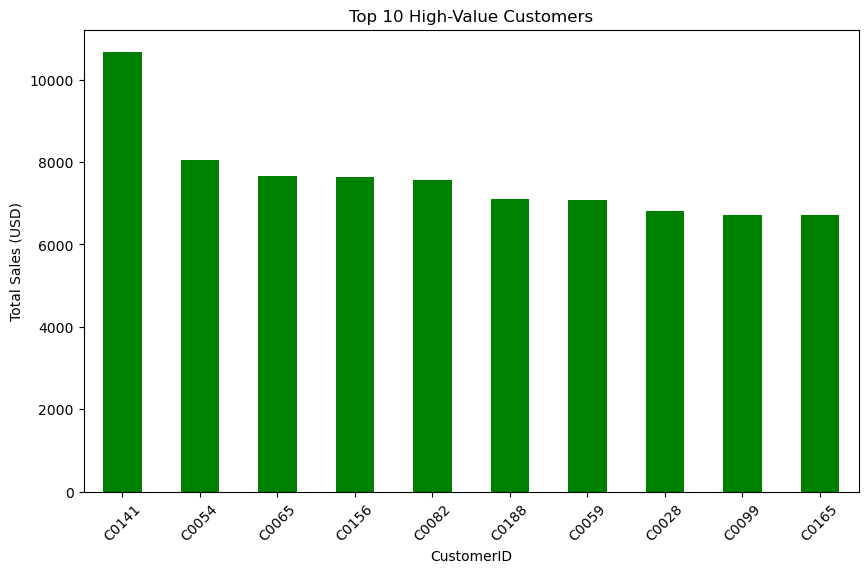

In [13]:
# High-Value Customers

customer_value = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 High-Value Customers:")
plt.figure(figsize=(10, 6))
customer_value.plot(kind='bar', title="Top 10 High-Value Customers", ylabel="Total Sales (USD)", color="green")
plt.xticks(rotation=45)
plt.show()


Underperforming Products:


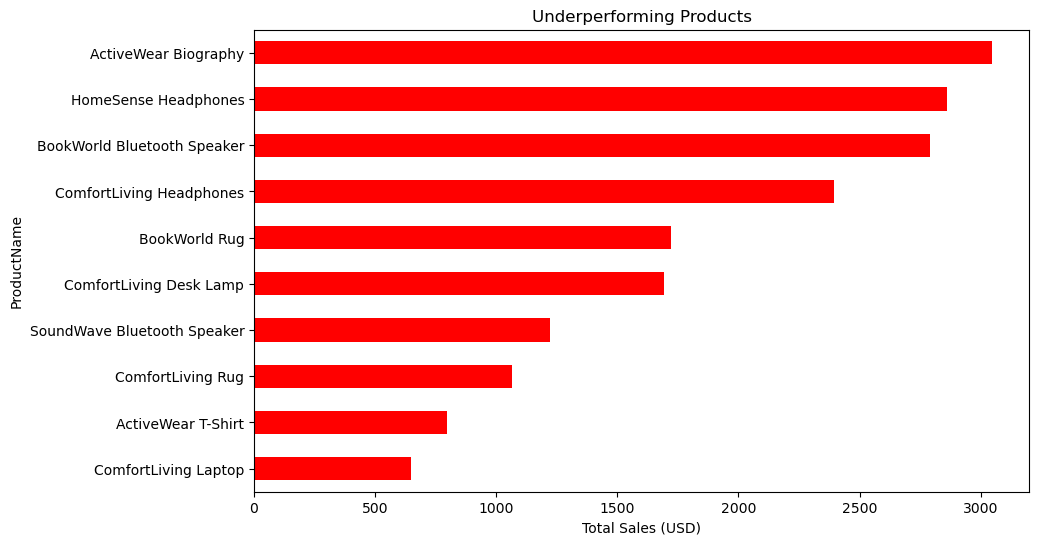

In [14]:
# Underperforming Products

low_performing_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values().head(10)
print("\nUnderperforming Products:")
plt.figure(figsize=(10, 6))
low_performing_products.plot(kind='barh', title="Underperforming Products", xlabel="Total Sales (USD)", color="red")
plt.show()